<center><b><u><font size="6" color="darkred">WINE QUALITY PREDICTION</font></u></b></center>

<img src="wineimg.jpeg" alt="wine predection" width="800" height="600">

# Introduction

Wine quality prediction is a data-driven process where you start by selecting a dataset that contains information about wines, including features like acidity, alcohol content, and pH levels, along with wine quality ratings. In the data exploration phase, you delve into the dataset's intricacies, examining its structure, distributions, and relationships between attributes. Preprocessing is the next step, involving data cleaning, handling missing values, and converting categorical variables into a usable format.

effective communication of your analysis is crucial, which includes presenting your findings through visualizations, summary tables, and clear explanations. This comprehensive process combines data exploration, machine learning, and effective reporting to derive actionable insights from wine data.

The heart of the process is the model selection and training stage. You'll decide whether you want to predict wine quality as a numeric score (regression) or categorize it (classification). For regression, you might choose linear regression, while for classification, decision trees, random forests, or support vector machines are common choices. These models are then trained on a portion of the data, learning from the patterns and relationships present.

After training, you evaluate the model's performance using appropriate metrics, such as mean squared error for regression or accuracy, precision, and recall for classification. Model tuning may be necessary to optimize performance by adjusting hyperparameters or trying alternative algorithms.

With a trained model, you can make predictions on new or unseen data to assess its practical utility. The interpretation phase involves analyzing feature importance, identifying which attributes influence wine quality the most, and drawing meaningful insights.



# Import module

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [15]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.shape

(1599, 12)

In [17]:
df.size

19188

In [18]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Preprocessing the dataset

In [20]:
# check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So as we see there is no missing value so we are good to go futher to data visualization

# Data Visualization

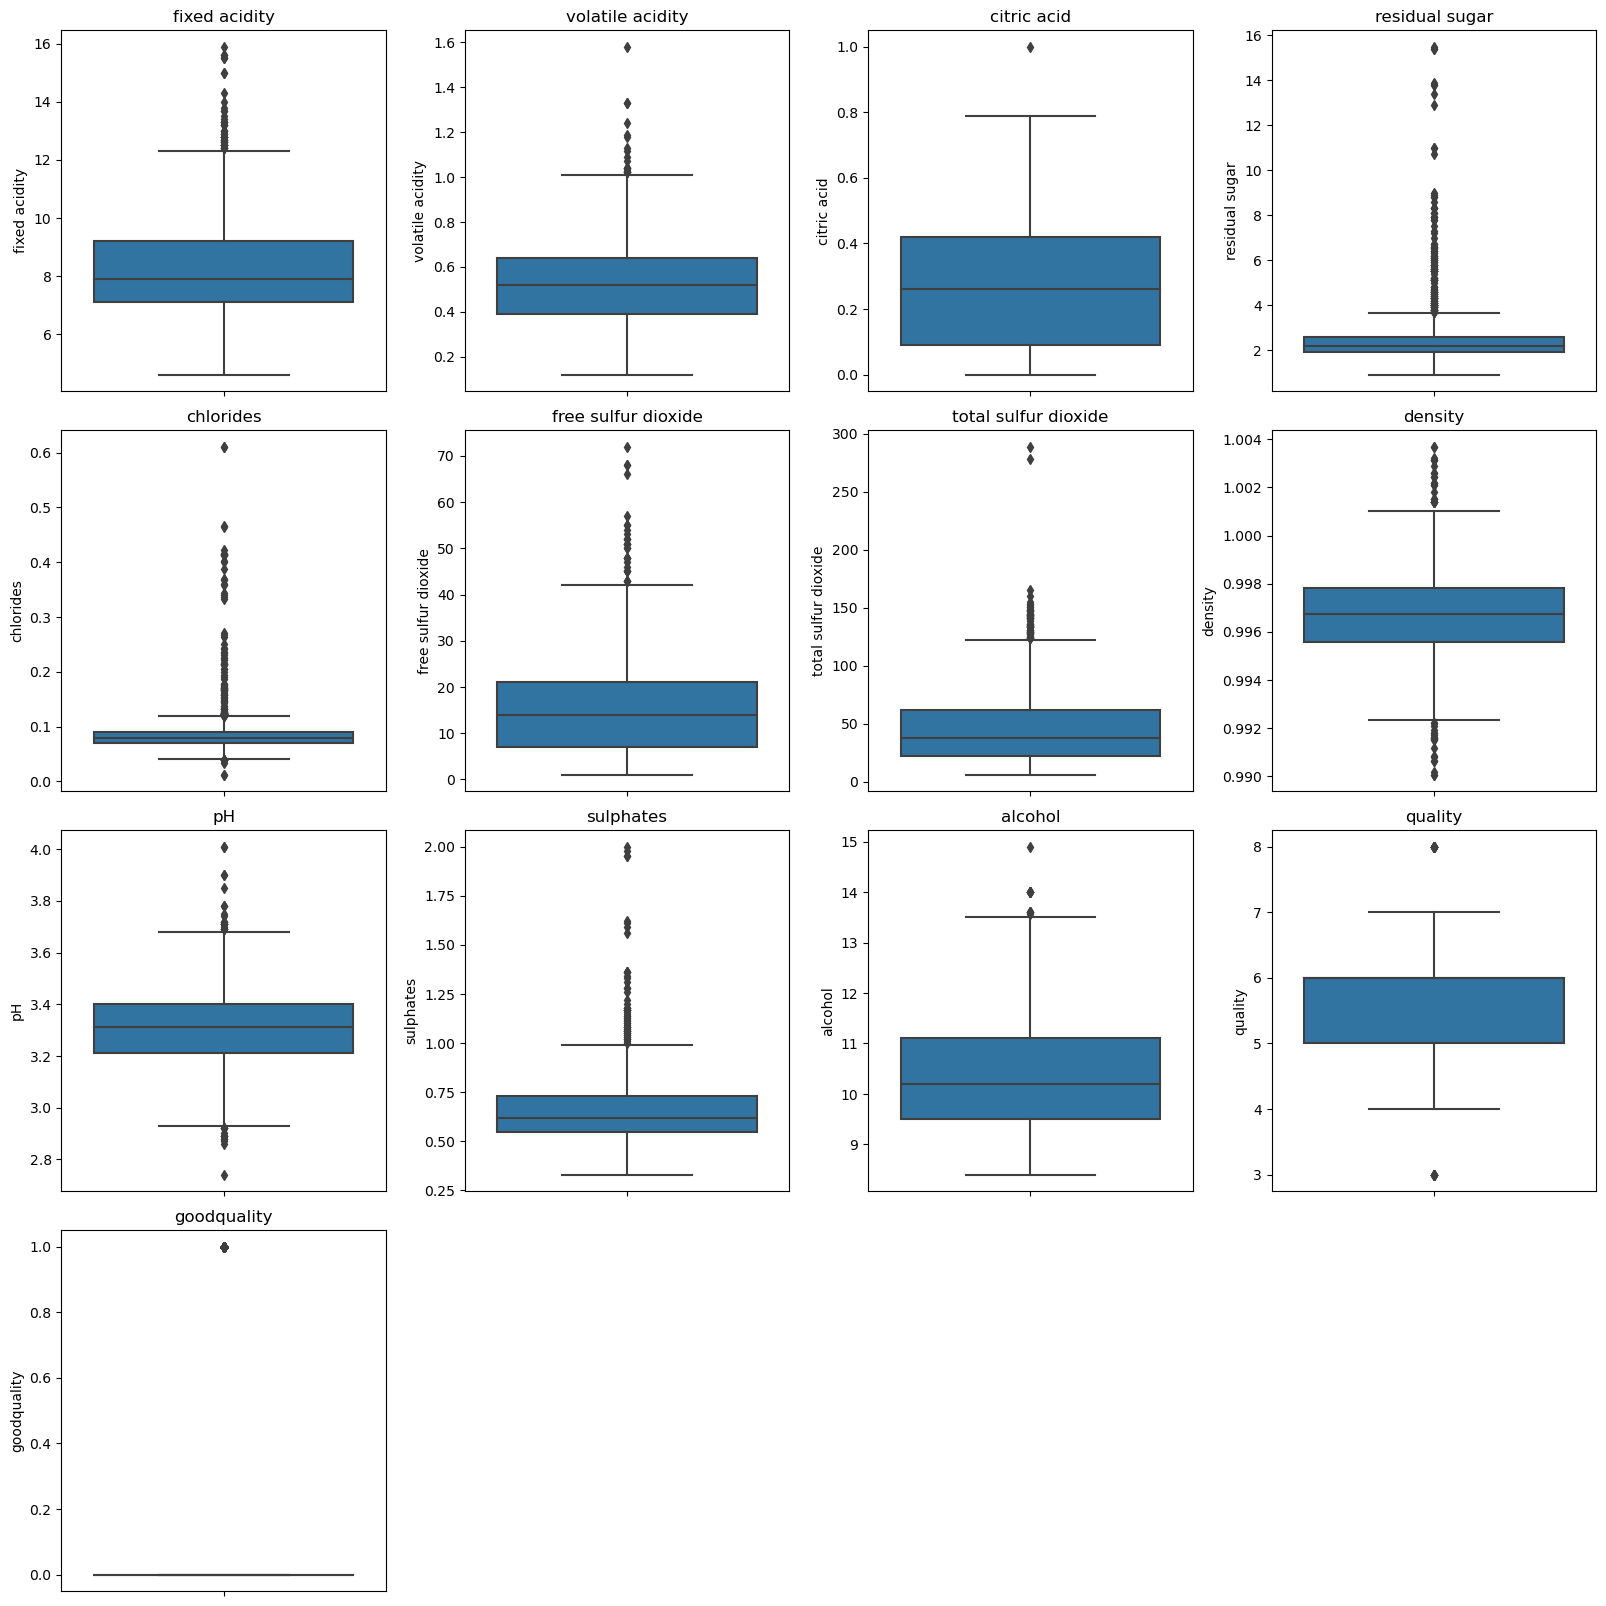

In [87]:
# Calculate the number of rows and columns based on the number of features
n_cols = 4  # Number of columns
n_rows = (df.shape[1] - 1) // n_cols + 1  # Number of rows, excluding the 'type' column

fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(16, 4 * n_rows))  # Adjust figsize for more rows
ax = ax.flatten()

for i, col in enumerate(df.columns):
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[i])
        ax[i].set_title(col)  # Set the title as the feature name

# Hide any empty subplots
for i in range(len(df.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=1.0)  # Increase h_pad for more vertical space
plt.show()


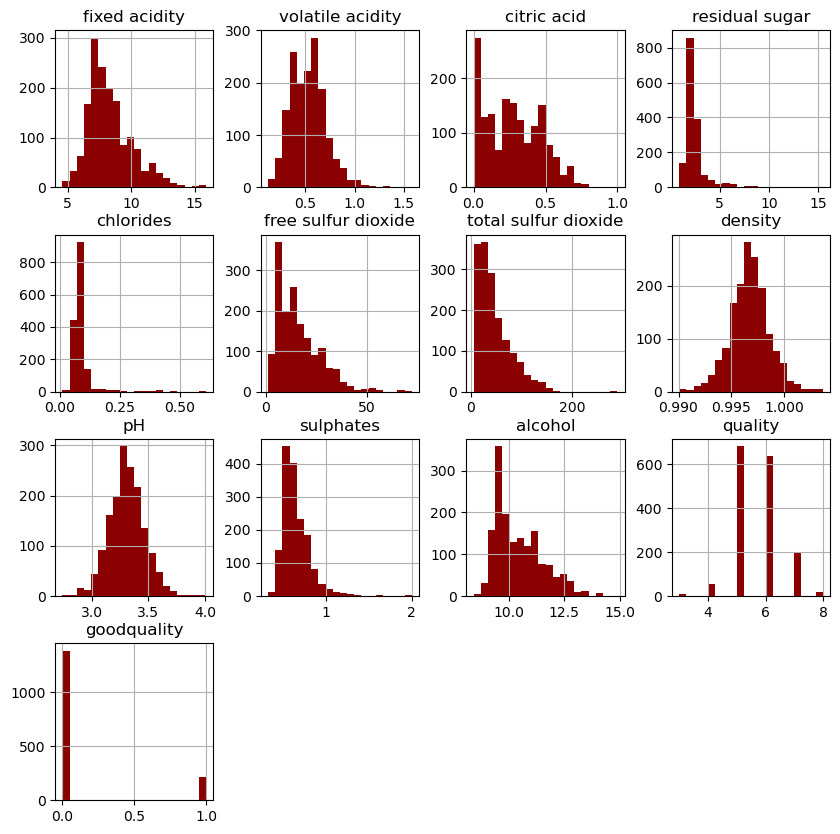

In [83]:
wine_color = 'darkred'  # Define the wine color
df.hist(bins=20, figsize=(10, 10), color=wine_color)  # Use the wine color
plt.show()

Observations regarding variables:

- All variables have outliers
- Fixed acidity, volatile acidity and citric acid have outliers. If those outliers are eliminated distribution of the variables    may be taken to be symmetric.
- Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.
- Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.
- Mostly outliers are on the larger side.
- Alcohol has an irregular shaped distribution but it does not have pronounced outliers.

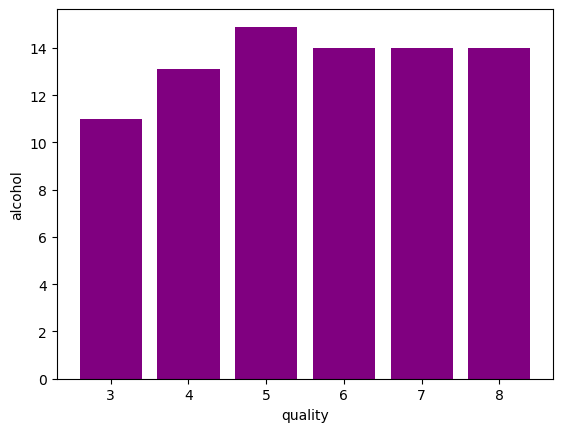

In [62]:
plt.bar(df['quality'], df['alcohol'], color='purple')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

The bar plot shows how the 'alcohol' content varies with 'quality' levels in the dataset. It helps you quickly see if there's a trend in alcohol content across quality levels. 

<Axes: xlabel='quality', ylabel='alcohol'>

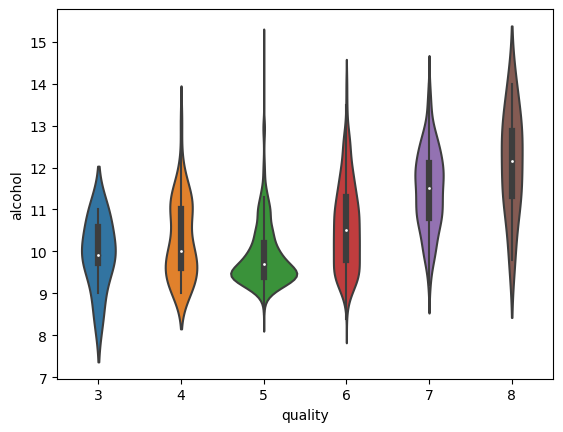

In [65]:
sns.violinplot(x='quality', y='alcohol', data=df)

# Coorelation Matrix

<Axes: >

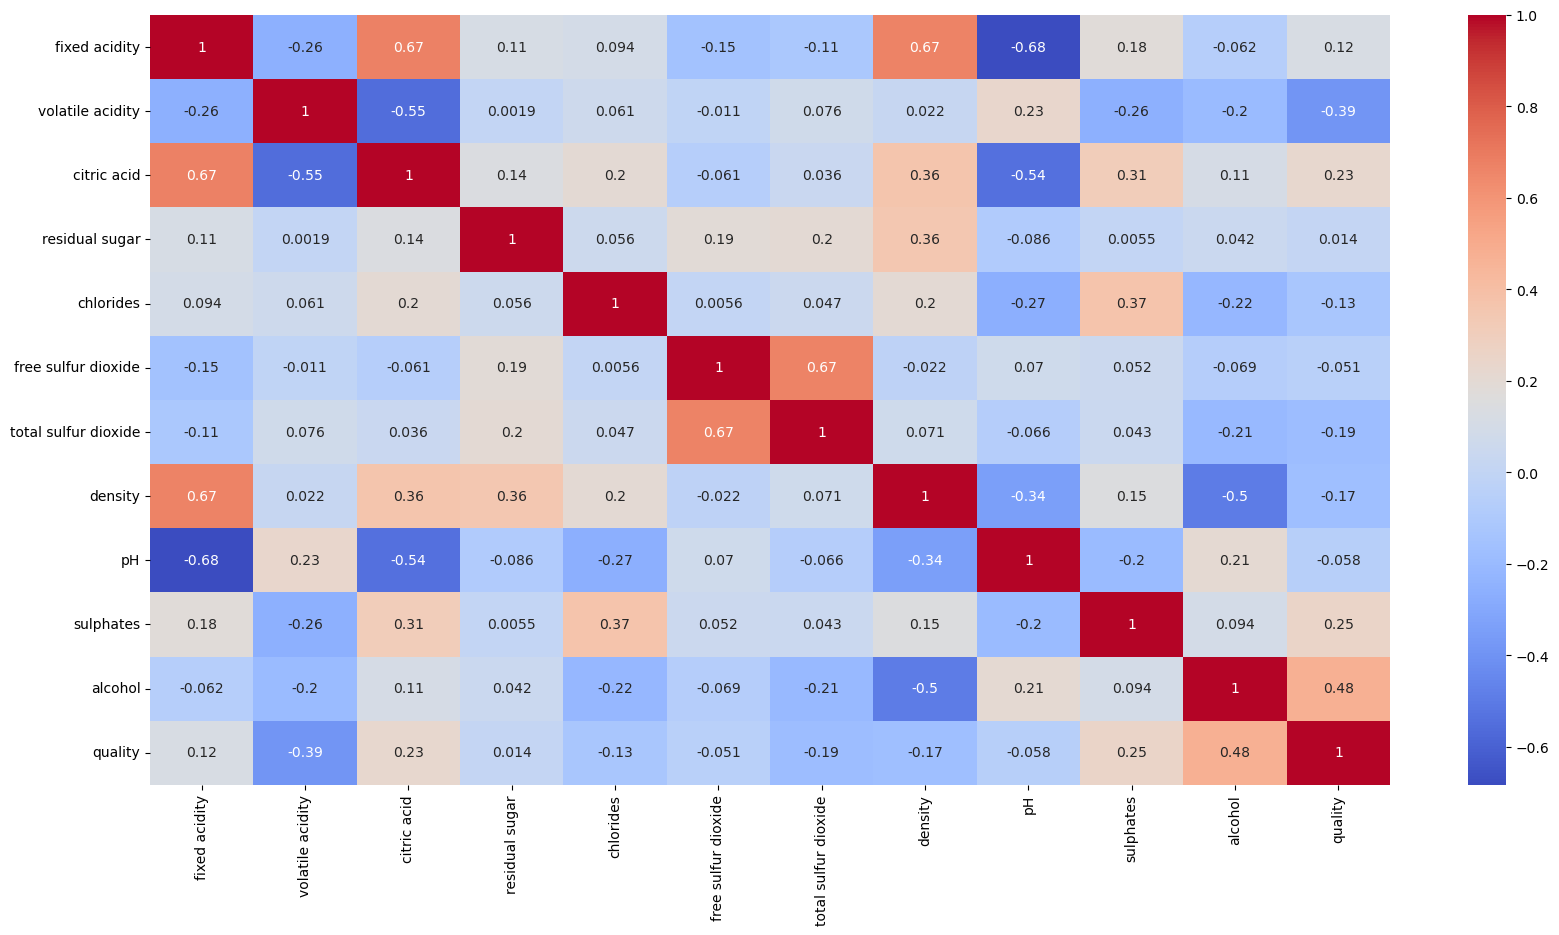

In [63]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

- Alcohol is positively correlated with the quality of the red wine.
- Alcohol has a weak positive correlation with the pH value.
- Citric acid and density have a strong positive correlation with fixed acidity.
- pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.

# Feature Selection

In [69]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [70]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [72]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [73]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


# Feature Importance

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07898114 0.09878358 0.09858175 0.07372464 0.07017483 0.06623333
 0.07966488 0.08745638 0.06791715 0.11287101 0.1656113 ]


# Dataset Split

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Model Training

# LogisticRegression:

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

Accuracy Score: 0.86875
[[399  18]
 [ 45  18]]


# KNN:

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8729166666666667


# SVC:

In [78]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.86875


# Decision Tree:

In [79]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8645833333333334


# Random Forest:

In [80]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.89375


# Xgboost:

In [81]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.8916666666666667


In [82]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.870,0.872,0.868,0.864,0.833,0.893,0.879]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


,Model
Score,
0.893,Random Forest
0.879,Xgboost
0.872,KNN
0.870,Logistic Regression
0.868,SVC
0.864,Decision Tree
0.833,GaussianNB


# Conclusion

Highest accurations was achieved by Random Forest, Decision Tree, Gradient Boosting, Gaussian Naive Bayes with 0.89%, followed by Xgboost (0.879%), KNN (0.872%), Logistic Regression (0.870%) and SVC (0.868%).

# Key Feature

1. The alcohol feature stands out as the most influential factor in determining wine quality.


2. The density of the wine comes next in terms of importance. It's important to note that density could be indicative of various    factors, including sugar content and overall richness.


3. Volatile Acidity is another noteworthy feature. Wines with lower volatile acidity tend to have higher quality ratings. This      corresponds to the common understanding that excessive volatile acidity can introduce undesirable flavors.